# Django视图事务

```python
from django.db import transaction

# open a transaction
@transaction.atomic
def viewfunc(request):

    a.save()
    # transaction now contains a.save()

    sid = transaction.savepoint()

    b.save()
    # transaction now contains a.save() and b.save()

    if want_to_keep_b:
        transaction.savepoint_commit(sid)
        # open transaction still contains a.save() and b.save()
    else:
        transaction.savepoint_rollback(sid)
        # open transaction now contains only a.save()
```

# 并发进行数据库操作
##### 悲观锁

```python
# 加锁
# sql语句：select * from database where id=1 for update;
# django语句：sku = GoodsSKU.objects.select_for_update().get(id=1)
# 事务结束，锁释放
```

##### 乐观锁

```python
# 查询时不加锁，但更新时进行判断
# 判断更新与查询状态是否一致
sku = GoodsSKU.objects.get(id=1, stock=old_stock).update(stock=new_stock)
```

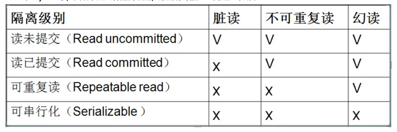

## 设置MySQL事务隔离级别
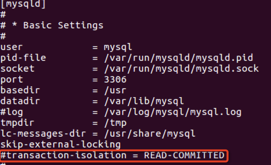
### Django2.0 连接MySQL数据库时默认使用读已提交隔离级别连接